In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#choose csv or xlsx
df = pd.read_csv("D:/postgraduate/comp9417/group project/COMP9417_Bravo_Project/AirQualityUCI.csv", sep=';', decimal=',', low_memory=False) #use your local path
# df = pd.read_excel("AirQualityUCI.xlsx", sheet_name='AirQualityUCI')

In [9]:
# drop empty lines
df = df.dropna(axis=1, how='all')

In [11]:
# row/column/varible name
print("data status:")
print(f"row: {df.shape[0]}")
print(f"column: {df.shape[1]}")
print("variables:")
print(df.columns.tolist())

data status:
row: 9471
column: 15
variables:
['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [15]:
# set datetime as index
df = df.set_index('Date').sort_index()

In [17]:
df.replace(-200, np.nan, inplace=True)

missing_summary = df.isna().sum().sort_values(ascending=False)
print("\n missing data(sorted by numbers):")
print(missing_summary)


 missing data(sorted by numbers):
NMHC(GT)         8557
CO(GT)           1797
NO2(GT)          1756
NOx(GT)          1753
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
PT08.S3(NOx)      480
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Time              114
dtype: int64


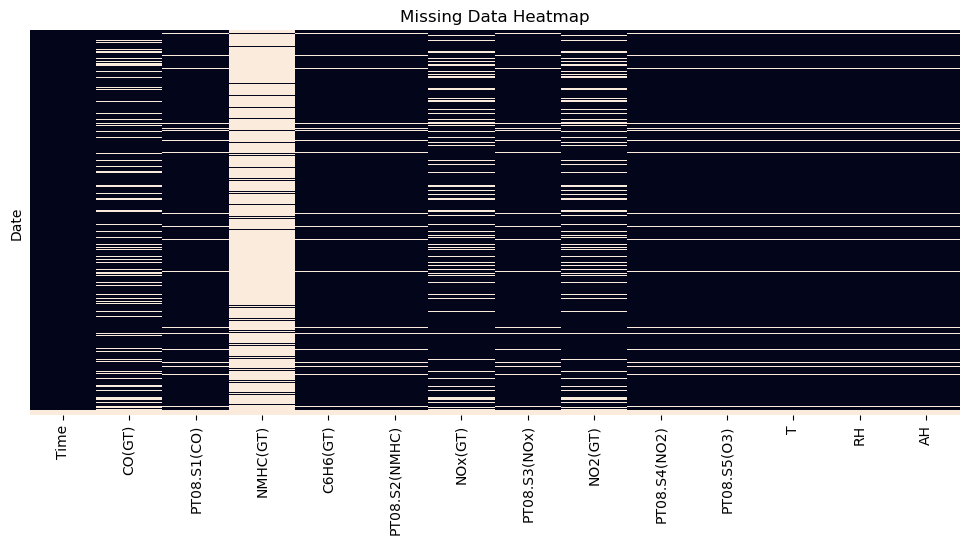

In [19]:
# visualise missing data
plt.figure(figsize=(12, 5))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [21]:
print("\n📈 data describe:")
display(df.describe())


📈 data describe:


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


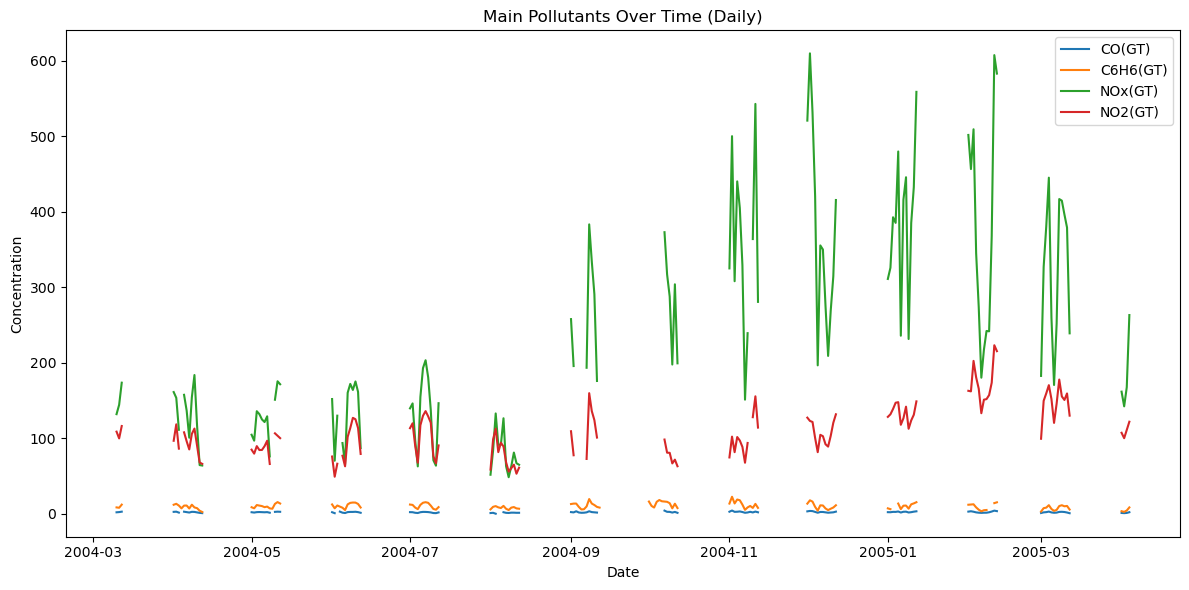

In [31]:
# Examine time patterns
if 'Date' in df.columns and 'Time' in df.columns:
    dt = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                        errors='coerce', dayfirst=True)
else:
    dt = pd.to_datetime(df.index.astype(str), errors='coerce', dayfirst=True)
df = df.loc[dt.notna()].copy()
df.index = dt[dt.notna()]
df.sort_index(inplace=True)

df.replace(-200, np.nan, inplace=True)
num_cols = df.select_dtypes(include='number').columns
df_daily = df[num_cols].resample('D').mean()

pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

plt.figure(figsize=(12, 6))
for col in pollutants:
    if col in df_daily.columns and df_daily[col].notna().sum() > 0:
        plt.plot(df_daily.index, df_daily[col], label=col)
plt.legend()
plt.title("Main Pollutants Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.tight_layout()
plt.show()

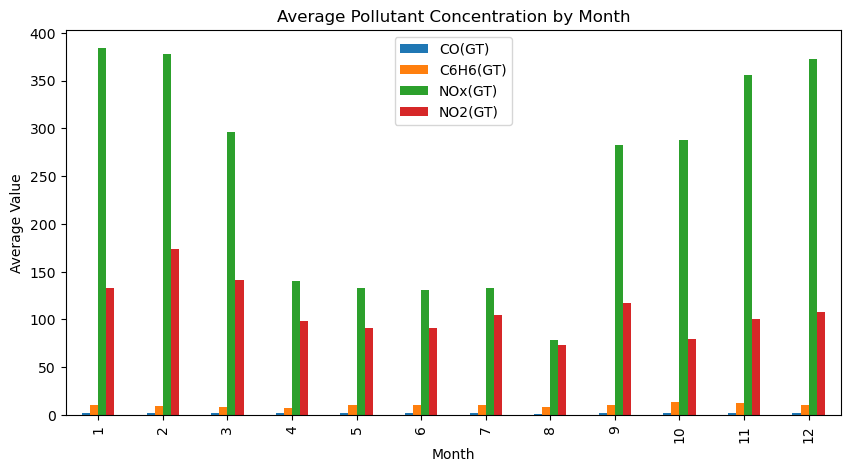

In [33]:
# Examine seasonal effects
df['Month'] = df.index.month
monthly_means = df.groupby('Month')[pollutants].mean()

monthly_means.plot(kind='bar', figsize=(10, 5))
plt.title("Average Pollutant Concentration by Month")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()

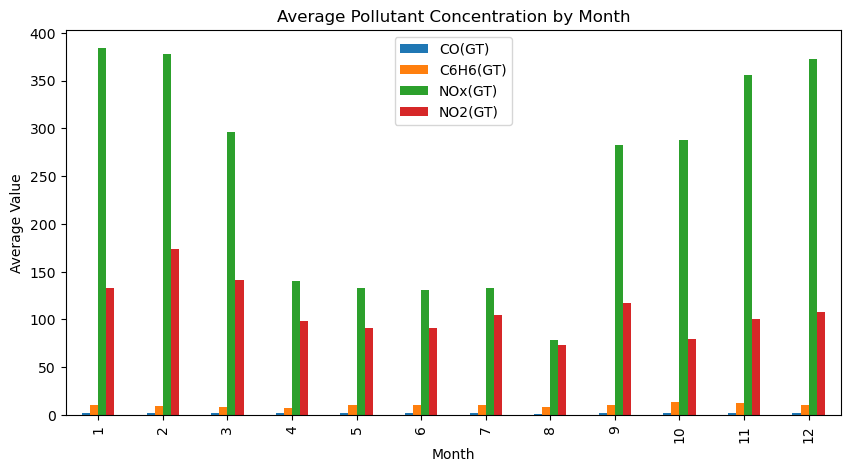

In [35]:
# Correlations among pollutants
df['Month'] = df.index.month
monthly_means = df.groupby('Month')[pollutants].mean()

monthly_means.plot(kind='bar', figsize=(10, 5))
plt.title("Average Pollutant Concentration by Month")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()

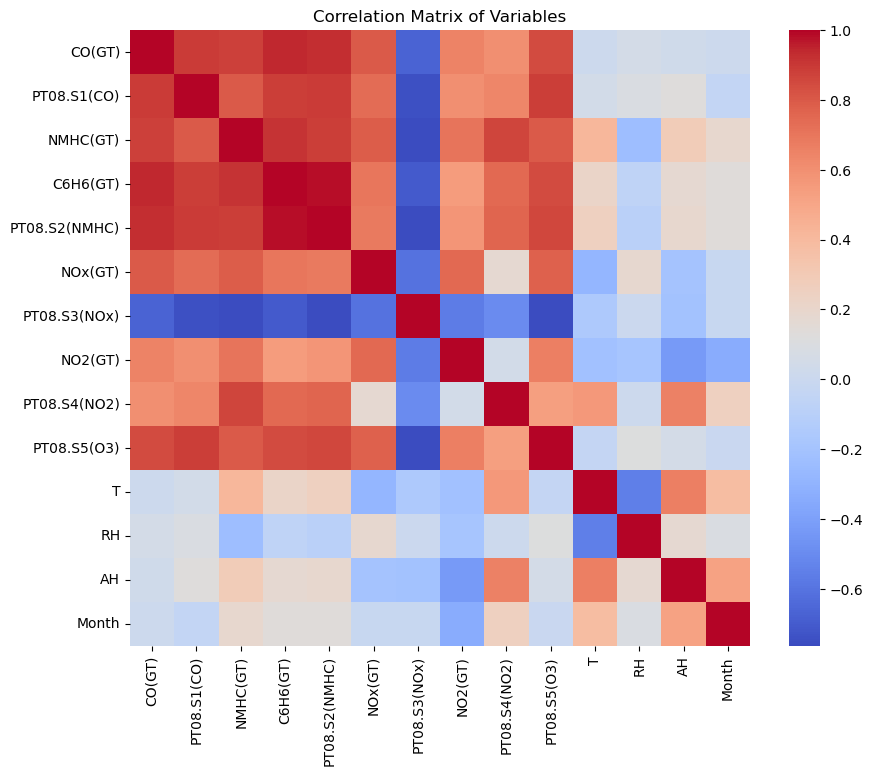

In [39]:
num_df = df.select_dtypes(include='number') 
corr_matrix = num_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Variables")
plt.show()

In [41]:
# top-10 pairs
corr_pairs = (
    corr_matrix.unstack()
    .dropna()
    .sort_values(key=np.abs, ascending=False)
    .drop_duplicates()
)
print("\n🔗 top-10 most relative pairs:")
print(corr_pairs.head(10))


🔗 top-10 most relative pairs:
CO(GT)         CO(GT)           1.000000
C6H6(GT)       PT08.S2(NMHC)    0.982963
               CO(GT)           0.940839
PT08.S2(NMHC)  CO(GT)           0.925186
C6H6(GT)       NMHC(GT)         0.917052
PT08.S1(CO)    PT08.S2(NMHC)    0.893363
               CO(GT)           0.891988
PT08.S5(O3)    PT08.S1(CO)      0.888338
C6H6(GT)       PT08.S1(CO)      0.884818
NMHC(GT)       PT08.S2(NMHC)    0.883784
dtype: float64


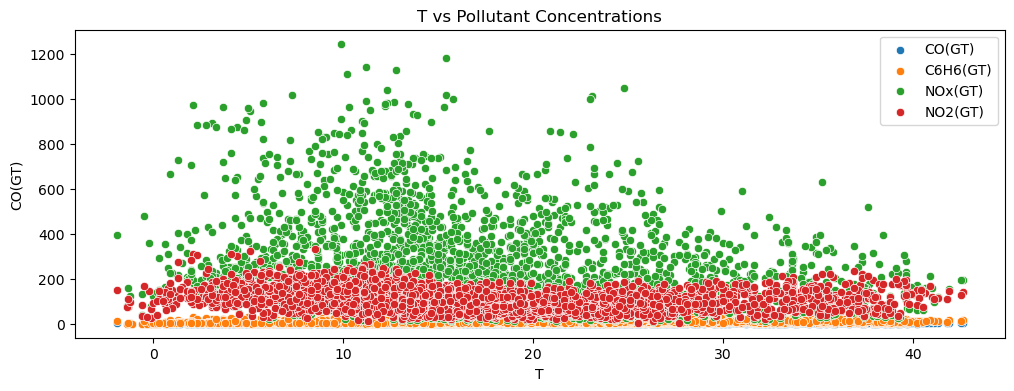

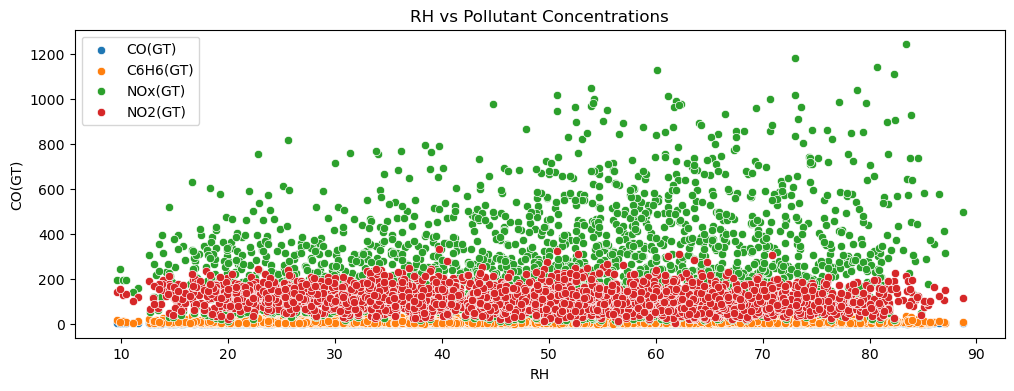

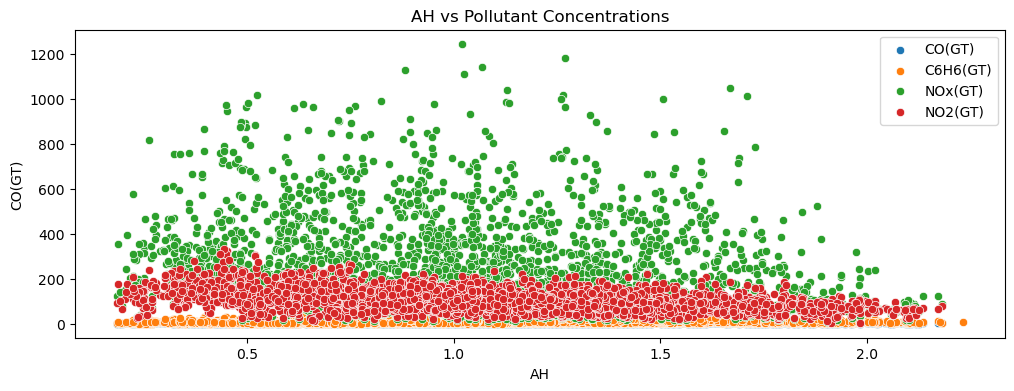

In [43]:
# Identify missing values
meteo_vars = ['T', 'RH', 'AH']

for m in meteo_vars:
    if m in df.columns:
        plt.figure(figsize=(12, 4))
        for col in pollutants:
            if col in df.columns:
                sns.scatterplot(x=df[m], y=df[col], label=col)
        plt.title(f"{m} vs Pollutant Concentrations")
        plt.legend()
        plt.show()


 ⏰ Time Gaps statistics:
count    3.596000e+03
mean     9.370412e+03
std      1.021760e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.728000e+06
Name: Date, dtype: float64


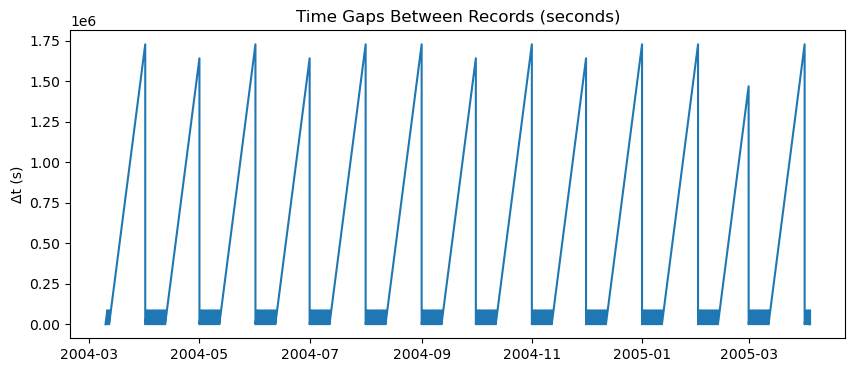

⚠️ detected CO(GT) with 29 errors
⚠️ detected C6H6(GT) with 35 errors
⚠️ detected NOx(GT) with 30 errors
⚠️ detected NO2(GT) with 30 errors
⚠️ detected T with 46 errors
⚠️ detected RH with 35 errors
⚠️ detected AH with 35 errors


In [45]:
# Examine data quality issues
time_diff = df.index.to_series().diff().dt.total_seconds().dropna()
print("\n ⏰ Time Gaps statistics:")
print(time_diff.describe())

plt.figure(figsize=(10,4))
plt.plot(time_diff)
plt.title("Time Gaps Between Records (seconds)")
plt.ylabel("Δt (s)")
plt.show()

for col in pollutants + meteo_vars:
    if col in df.columns:
        outlier_mask = (df[col] < 0) | (df[col] > df[col].quantile(0.99))
        if outlier_mask.any():
            print(f"⚠️ detected {col} with {outlier_mask.sum()} errors")